In [1]:
import numpy as np
import mxnet as mx
import sys
sys.path.insert(0,'lib')

In [2]:
from symbols.detnet import detnet
sym_instance = detnet()
data = mx.sym.Variable('data')
sym = sym_instance.get_detnet_backbone(data=data)
out = mx.sym.Pooling(data=sym[-1], global_pool="true", kernel=(14,14), stride=(1,1), pool_type="avg")
out.infer_shape(data=(32,3,224,224))[1]
pred = mx.sym.FullyConnected(data=out,num_hidden = 1000)
from utils.load_model import load_param
pretrained = '/mnt/data-1/data/jiajie.tang/cluster-detnet/mxnet-detnet/model/pretrained_model/detnet59'
begin_epoch = 0
arg_params, aux_params = load_param(pretrained, begin_epoch, convert = True)
mod = mx.mod.Module(pred,data_names = ['data'],context = mx.gpu(0))
arg_params['fullyconnected0_weight'] = arg_params['fullyconnected1_weight']
arg_params['fullyconnected0_bias'] = arg_params['fullyconnected1_bias']
mod.bind(data_shapes = [('data',(1,3,224,224))])
mod.init_params(arg_params=arg_params, aux_params=aux_params)

In [3]:
import cv2
import os
os.listdir('images/')

In [4]:
img = cv2.imread('images/cat3.jpeg')[:,:,::-1]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.imshow(img)
plt.show()

In [7]:
img = (img/255 - np.array([[[0.485, 0.456, 0.406]]]))/np.array([[[0.229, 0.224, 0.225]]])
img = cv2.resize(img,(224,224))
img = img.transpose((2,0,1))
img = img[np.newaxis,:,:,:]
mod.forward(mx.io.DataBatch(data=[mx.nd.array(img)]),is_train = False)
np.argmax(mod.get_outputs()[0].asnumpy())

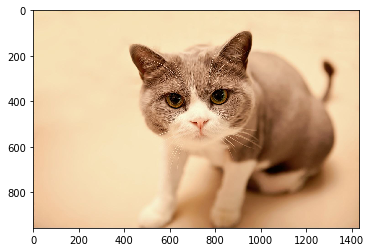

In [66]:
np.max(mod.get_outputs()[0].asnumpy())